Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading The Data Set

In [5]:
df = pd.read_csv("Salary_dataset.csv")
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


EDA

In [6]:
df.shape

(30, 3)

In [7]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [10]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Machine Learning

In [11]:
X = df[["YearsExperience"]]
y = df["Salary"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

Scaling The X Value - Standard Scalar

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Visualizing 

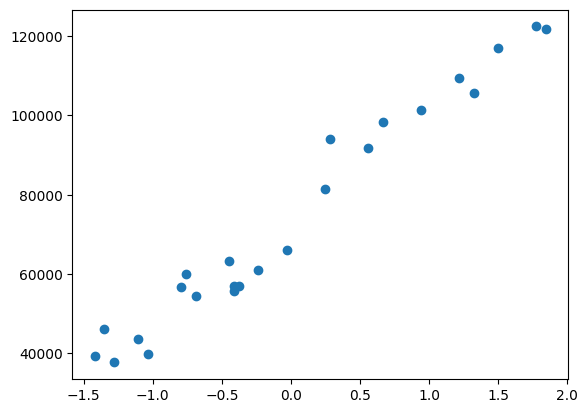

In [23]:
plt.scatter(X_train,y_train)

Training Model

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Checking Slope And Intercept

In [27]:
print("The slope (m) :",model.coef_[0])
print("The Intercept (c) :",model.intercept_)

The slope (m) : 27151.537425833674
The Intercept (c) : 74208.625


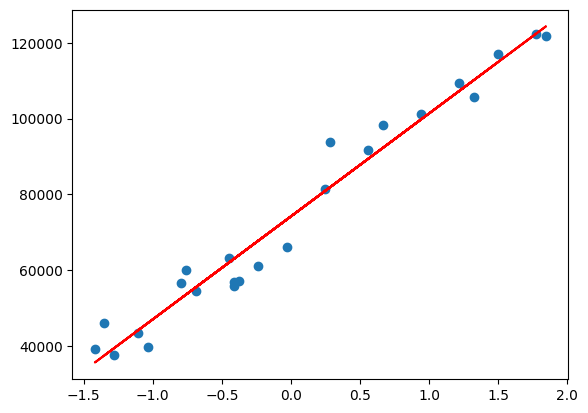

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),'r')

Testing The Model

In [30]:
y_pred = model.predict(X_test)
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [31]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

Performance

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
mse,mae,rmse

(49830096.85590836, 6286.453830757742, np.float64(7059.043621901507))

Accuracy

In [35]:
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test,y_pred)
score

0.9024461774180498

### Making Prediction From The Model

In [45]:
value = float(input("Enter Your Years Of Experience : "))
prediction = model.predict(scaler.transform([[value]]))
print(f"You Have {value} Years Of Experience.So, Your Salary Should Be {round(prediction[0],2)}")

You Have 2.1 Years Of Experience.So, Your Salary Should Be 44170.21


c:\Users\asus2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
